In [38]:
import dvc.api 
import pandas as pd
import io
import warnings 
warnings.filterwarnings('ignore')
import sys
import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing

sys.path.insert(0,'../scripts/')
from data_clean import DataClean
from data_info import DataInfo
from plots import Plots





In [3]:
#path  = 'data/sample_submission.csv'
#repo = 'https://github.com/nahomHmichael/Rossman-Pharmaceutical-Sales-Pridiction'
#rev = 'ba1700'
#df = pd.read_csv(io.StringIO(data_url),low_memory=False)


In [4]:
sample_data = pd.read_csv('../data/sample_submission.csv')
store_data = pd.read_csv('../data/store.csv')
test_data = pd.read_csv('../data/test.csv')
train_data = pd.read_csv('../data/train.csv')

In [5]:
sample_data.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [6]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [8]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [9]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [12]:
store_info = DataInfo(store_data)
test_info = DataInfo(test_data)
train_info = DataInfo(train_data)

In [13]:
store_info.columns_WithMissingValue()

['CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [14]:
test_info.columns_WithMissingValue()

['Open']

In [15]:
train_info.columns_WithMissingValue()

[]

In [16]:
store_info.get_column_based_missing_percentage()

,total_missing_values,missing_percentage
Store,0,0.0 %
StoreType,0,0.0 %
Assortment,0,0.0 %
CompetitionDistance,3,0.27 %
CompetitionOpenSinceMonth,354,31.75 %
CompetitionOpenSinceYear,354,31.75 %
Promo2,0,0.0 %
Promo2SinceWeek,544,48.79 %
Promo2SinceYear,544,48.79 %
PromoInterval,544,48.79 %


In [17]:
test_info.get_column_based_missing_percentage()

,total_missing_values,missing_percentage
Id,0,0.0 %
Store,0,0.0 %
DayOfWeek,0,0.0 %
Date,0,0.0 %
Open,11,0.03 %
Promo,0,0.0 %
StateHoliday,0,0.0 %
SchoolHoliday,0,0.0 %


In [18]:
train_info.get_column_based_missing_percentage()

,total_missing_values,missing_percentage
Store,0,0.0 %
DayOfWeek,0,0.0 %
Date,0,0.0 %
Sales,0,0.0 %
Customers,0,0.0 %
Open,0,0.0 %
Promo,0,0.0 %
StateHoliday,0,0.0 %
SchoolHoliday,0,0.0 %


In [19]:
# filling the missing values in the store data 
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].median(), inplace=True)
store_data.CompetitionOpenSinceMonth.fillna(0,inplace=True)
store_data.CompetitionOpenSinceYear.fillna(0,inplace=True)
store_data.Promo2SinceWeek.fillna(0,inplace=True)
store_data.Promo2SinceYear.fillna(0,inplace=True)
store_data.PromoInterval.fillna(0,inplace=True)

In [20]:
# Checking if missing values are filled 
store_info.get_column_based_missing_percentage()

,total_missing_values,missing_percentage
Store,0,0.0 %
StoreType,0,0.0 %
Assortment,0,0.0 %
CompetitionDistance,0,0.0 %
CompetitionOpenSinceMonth,0,0.0 %
CompetitionOpenSinceYear,0,0.0 %
Promo2,0,0.0 %
Promo2SinceWeek,0,0.0 %
Promo2SinceYear,0,0.0 %
PromoInterval,0,0.0 %


In [21]:
test_data['Open'].fillna(test_data['Open'].median(), inplace=True)

In [22]:
test_info.get_column_based_missing_percentage()

,total_missing_values,missing_percentage
Id,0,0.0 %
Store,0,0.0 %
DayOfWeek,0,0.0 %
Date,0,0.0 %
Open,0,0.0 %
Promo,0,0.0 %
StateHoliday,0,0.0 %
SchoolHoliday,0,0.0 %


Missing values are filled!

In [26]:
store_data.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [28]:
test_data.dtypes

Id                 int64
Store              int64
DayOfWeek          int64
Date              object
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object

In [29]:
train_data.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

Converting Date object type columns to Date datetime dtype

In [30]:
test_data['Date'] = pd.to_datetime(test_data['Date'])
train_data['Date'] = pd.to_datetime(train_data['Date'])

In [32]:
test_data.dtypes

Id                        int64
Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Open                    float64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [33]:
train_data.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

Date parsing

In [34]:
test_clean = DataClean(test_data)
train_clean = DataClean(train_data)

In [35]:
test_clean.dateParser(col='Date')
train_clean.dateParser(col='Date')


In [37]:
test_data.head()

,Id,Store,DayOfWeek,Date,Year,Month,Day,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,2015,9,17,1.0,1,0,0
1,2,3,4,2015-09-17,2015,9,17,1.0,1,0,0
2,3,7,4,2015-09-17,2015,9,17,1.0,1,0,0
3,4,8,4,2015-09-17,2015,9,17,1.0,1,0,0
4,5,9,4,2015-09-17,2015,9,17,1.0,1,0,0


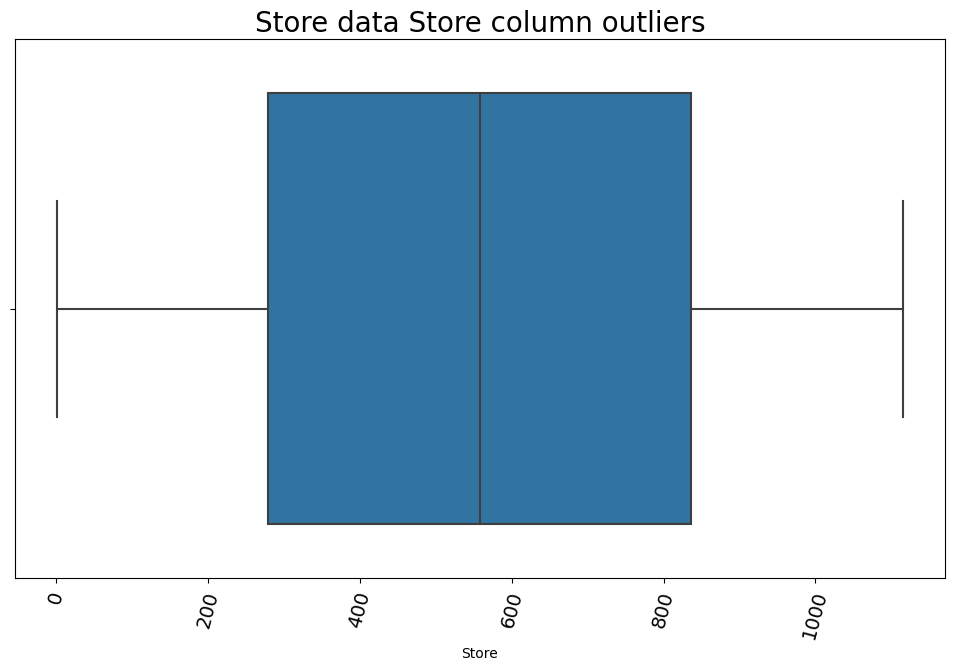

In [48]:
Plots.plot_box(store_data,'Store','Store data Store column outliers')

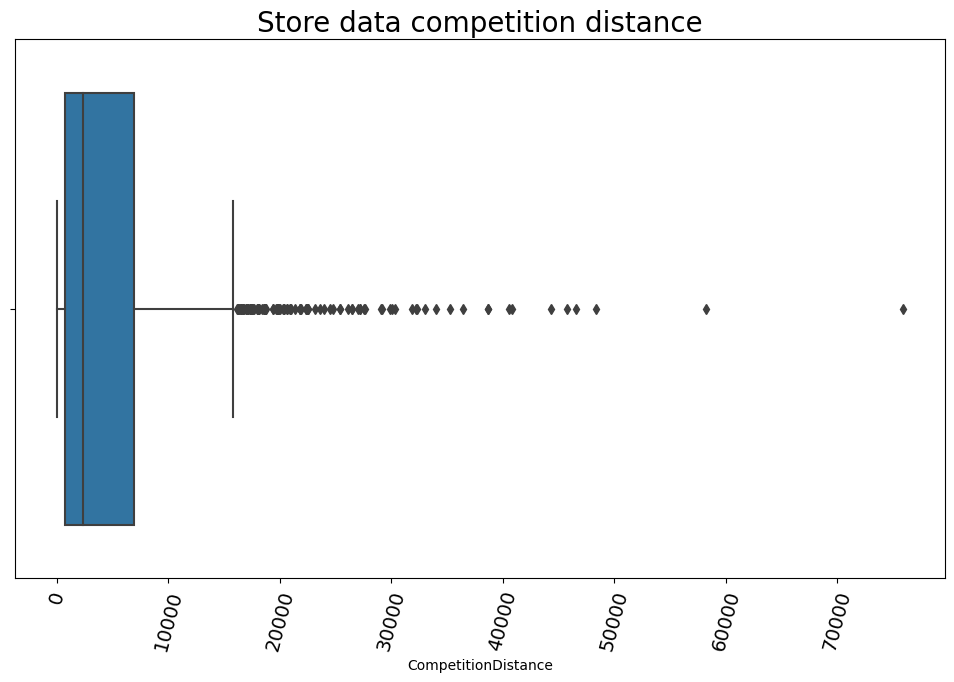

In [49]:
Plots.plot_box(store_data,'CompetitionDistance','Store data competition distance')

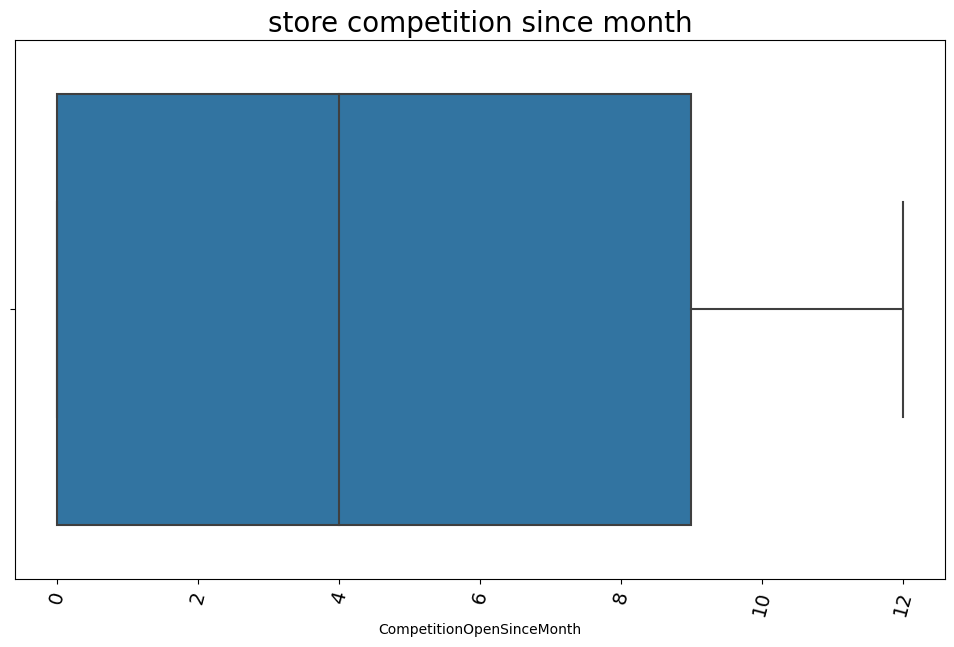

In [50]:
Plots.plot_box(store_data,'CompetitionOpenSinceMonth','store competition since month')

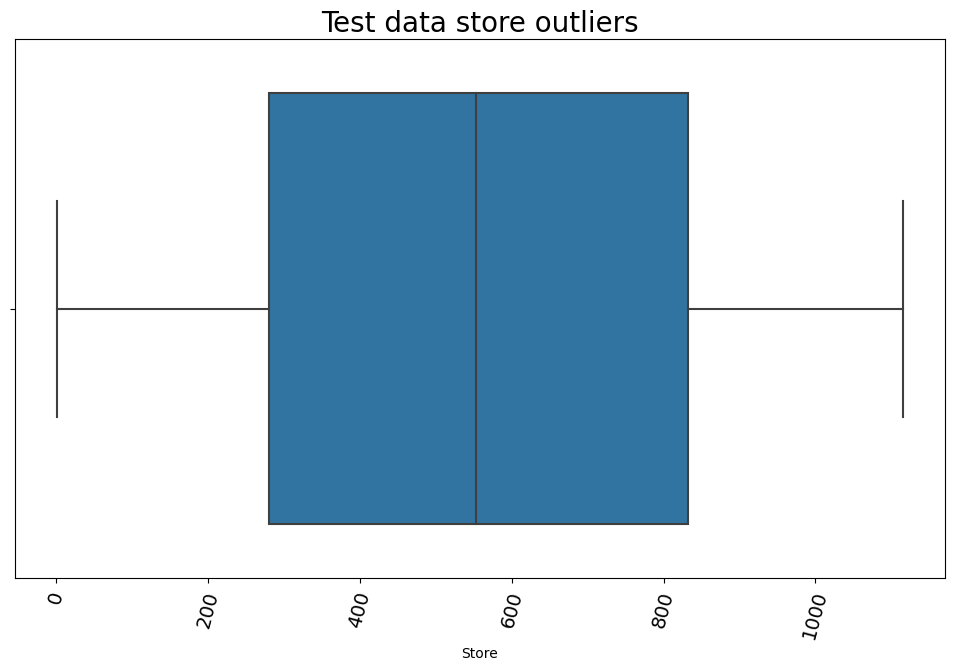

In [40]:
Plots.plot_box(test_data,'Store','Test data store outliers')

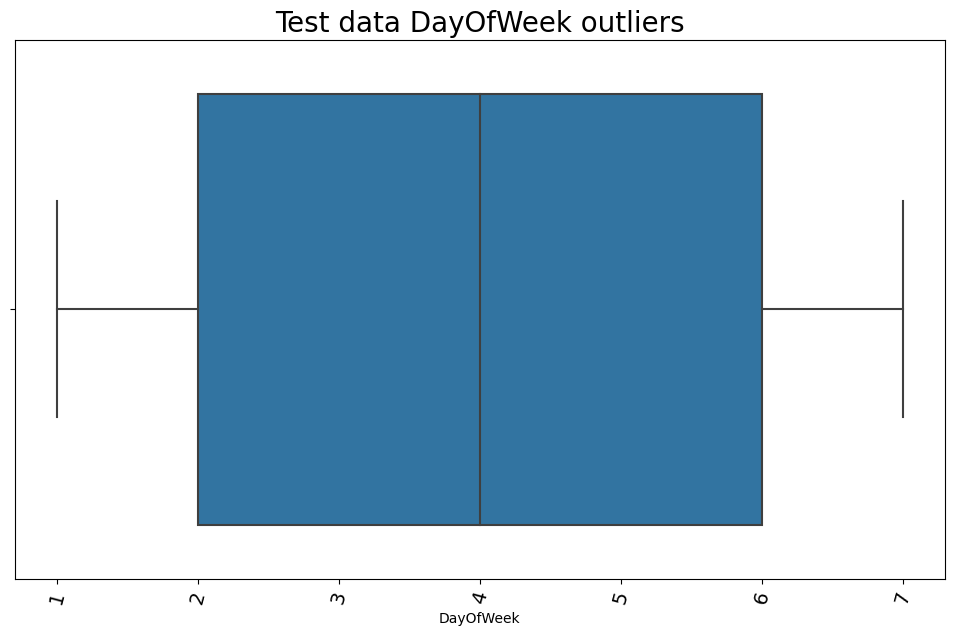

In [41]:
Plots.plot_box(test_data,'DayOfWeek','Test data DayOfWeek outliers')

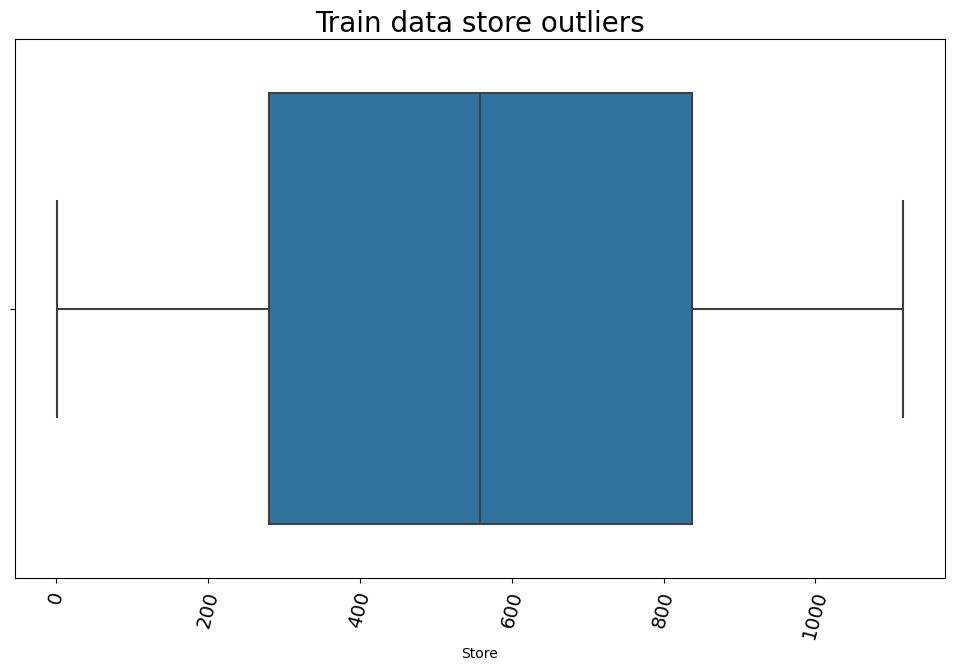

In [44]:
#Plots.plot_box(test_data,'Open','Test data Open outliers')
Plots.plot_box(train_data,'Store','Train data store outliers')


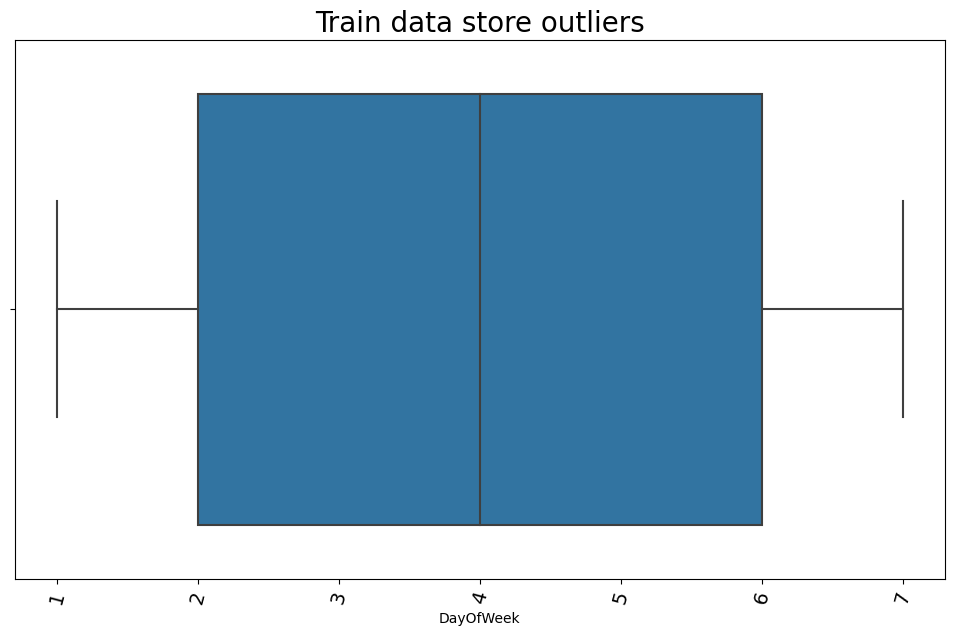

In [45]:
Plots.plot_box(train_data,'DayOfWeek','Train data store outliers')


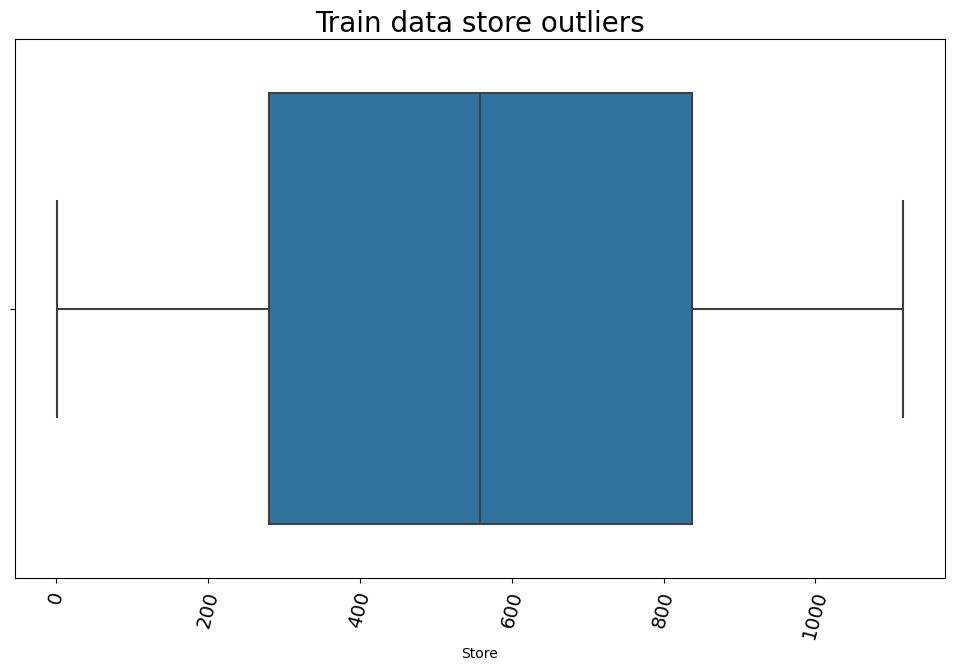

In [46]:
Plots.plot_box(train_data,'Store','Train data store outliers')

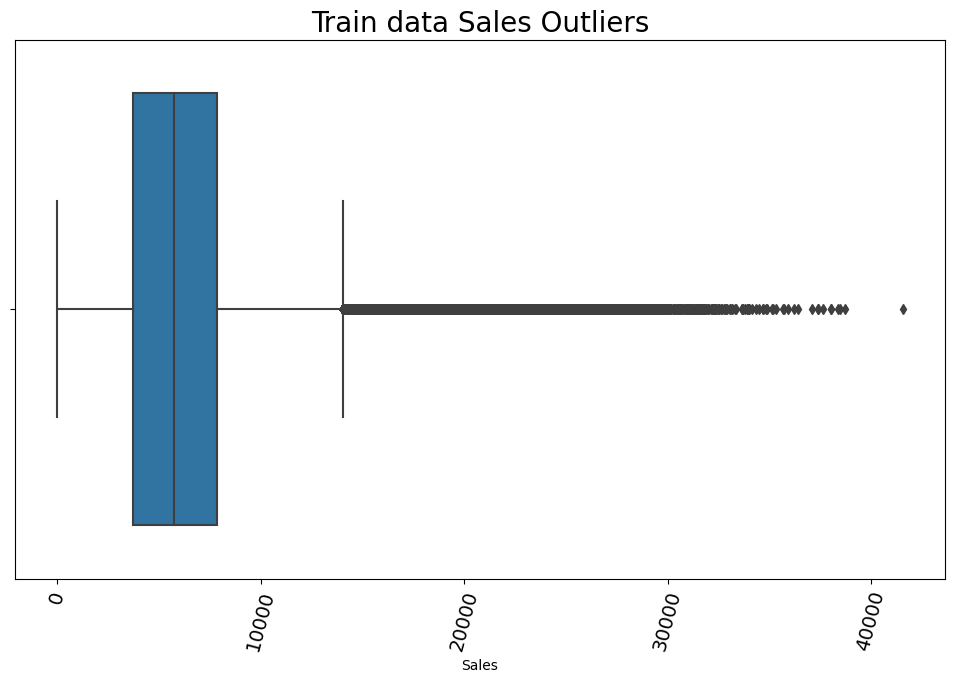

In [47]:
Plots.plot_box(train_data,'Sales','Train data Sales Outliers')